http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. 
- You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [235]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [236]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)
print(type(s))

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
<class 'pandas.core.series.Series'>


Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [237]:
dates = pd.date_range('2013-01-01', periods=6, freq='D') # freq = D(day), H(hour), M(month), W(week), Q(quarter), T(minute)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [238]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01  0.859819 -0.411664  0.075702 -0.348861
2013-01-02  0.123841 -1.127964  1.578056  0.760414
2013-01-03  0.938995  0.259284  1.009720  0.326113
2013-01-04  0.775228  0.685238 -0.030874  1.043324
2013-01-05 -0.448766  0.467593 -1.586272  0.464299
2013-01-06 -0.272792 -1.330011 -0.298595 -0.614824


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [239]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [240]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [241]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [242]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [243]:
print(df.head(4))

                   A         B         C         D
2013-01-01  0.859819 -0.411664  0.075702 -0.348861
2013-01-02  0.123841 -1.127964  1.578056  0.760414
2013-01-03  0.938995  0.259284  1.009720  0.326113
2013-01-04  0.775228  0.685238 -0.030874  1.043324


In [244]:
df.tail(3)

,A,B,C,D
2013-01-04,0.775228,0.685238,-0.030874,1.043324
2013-01-05,-0.448766,0.467593,-1.586272,0.464299
2013-01-06,-0.272792,-1.330011,-0.298595,-0.614824


Display the index, columns, and the underlying numpy data

In [245]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [246]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [247]:
print(df.values)
print(type(df.values))
print(df.values.ndim, df.values.shape)

[[ 0.85981902 -0.41166407  0.07570196 -0.348861  ]
 [ 0.12384052 -1.12796369  1.57805629  0.76041401]
 [ 0.93899456  0.25928447  1.00971995  0.32611259]
 [ 0.77522768  0.68523786 -0.03087436  1.04332429]
 [-0.44876642  0.46759331 -1.5862723   0.46429946]
 [-0.27279176 -1.33001102 -0.29859509 -0.6148237 ]]
<class 'numpy.ndarray'>
2 (6, 4)


Describe shows a quick statistic summary of your data

In [248]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.329387,-0.242921,0.124623,0.271744
std,0.610270,0.849948,1.098063,0.639581
min,-0.448766,-1.330011,-1.586272,-0.614824
25%,-0.173634,-0.948889,-0.231665,-0.180118
50%,0.449534,-0.076190,0.022414,0.395206
75%,0.838671,0.415516,0.776215,0.686385
max,0.938995,0.685238,1.578056,1.043324


Transposing your data

In [249]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.859819,0.123841,0.938995,0.775228,-0.448766,-0.272792
B,-0.411664,-1.127964,0.259284,0.685238,0.467593,-1.330011
C,0.075702,1.578056,1.009720,-0.030874,-1.586272,-0.298595
D,-0.348861,0.760414,0.326113,1.043324,0.464299,-0.614824


Sorting by an axis

In [250]:
#  sorts the columns of the DataFrame by column labels, in descending order.
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.348861,0.075702,-0.411664,0.859819
2013-01-02,0.760414,1.578056,-1.127964,0.123841
2013-01-03,0.326113,1.009720,0.259284,0.938995
2013-01-04,1.043324,-0.030874,0.685238,0.775228
2013-01-05,0.464299,-1.586272,0.467593,-0.448766
2013-01-06,-0.614824,-0.298595,-1.330011,-0.272792


Sorting by value

In [251]:
df.sort_values(by='B') # sorts by values in  column B

,A,B,C,D
2013-01-06,-0.272792,-1.330011,-0.298595,-0.614824
2013-01-02,0.123841,-1.127964,1.578056,0.760414
2013-01-01,0.859819,-0.411664,0.075702,-0.348861
2013-01-03,0.938995,0.259284,1.009720,0.326113
2013-01-05,-0.448766,0.467593,-1.586272,0.464299
2013-01-04,0.775228,0.685238,-0.030874,1.043324


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [252]:
df['A']

2013-01-01    0.859819
2013-01-02    0.123841
2013-01-03    0.938995
2013-01-04    0.775228
2013-01-05   -0.448766
2013-01-06   -0.272792
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [253]:
df[0:3]

,A,B,C,D
2013-01-01,0.859819,-0.411664,0.075702,-0.348861
2013-01-02,0.123841,-1.127964,1.578056,0.760414
2013-01-03,0.938995,0.259284,1.009720,0.326113


In [254]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.123841,-1.127964,1.578056,0.760414
2013-01-03,0.938995,0.259284,1.009720,0.326113
2013-01-04,0.775228,0.685238,-0.030874,1.043324


### Selection by Label

See more in [Selection by Label](Selection by Label)

In [255]:
dates = pd.date_range('2013-01-01', periods=6, freq='D')
print(dates)

print(df.loc[dates[0]]) # For getting a cross section using a label
print("####################")
print(df.loc[dates[0],'A']) # For getting a scalar value

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
A    0.859819
B   -0.411664
C    0.075702
D   -0.348861
Name: 2013-01-01 00:00:00, dtype: float64
####################
0.8598190249395169


Selection by Label

In [256]:
obj = df.loc[:,['A','B']] # all rows of column A and B
print(type(obj))
print(obj)

<class 'pandas.core.frame.DataFrame'>
                   A         B
2013-01-01  0.859819 -0.411664
2013-01-02  0.123841 -1.127964
2013-01-03  0.938995  0.259284
2013-01-04  0.775228  0.685238
2013-01-05 -0.448766  0.467593
2013-01-06 -0.272792 -1.330011


Showing label slicing, both endpoints are included

In [257]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.123841,-1.127964
2013-01-03,0.938995,0.259284
2013-01-04,0.775228,0.685238


Reduction in the dimensions of the returned object

In [258]:
df.loc['20130102',['A','B']]

A    0.123841
B   -1.127964
Name: 2013-01-02 00:00:00, dtype: float64

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [259]:
df.iloc[3]

A    0.775228
B    0.685238
C   -0.030874
D    1.043324
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [260]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.775228,0.685238
2013-01-05,-0.448766,0.467593


By lists of integer position locations, similar to the numpy/python style

In [261]:
df.iloc[[1,2,4],[0,2]] #  [1,2,4] are rows idx, and [0,2] are col idx

,A,C
2013-01-02,0.123841,1.578056
2013-01-03,0.938995,1.009720
2013-01-05,-0.448766,-1.586272


For slicing rows explicitly

In [262]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.123841,-1.127964,1.578056,0.760414
2013-01-03,0.938995,0.259284,1.009720,0.326113


For slicing columns explicitly

In [263]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.411664,0.075702
2013-01-02,-1.127964,1.578056
2013-01-03,0.259284,1.009720
2013-01-04,0.685238,-0.030874
2013-01-05,0.467593,-1.586272
2013-01-06,-1.330011,-0.298595


For getting a value explicitly

In [264]:
df.iloc[1,1]

-1.1279636865004945

For getting fast access to a scalar (equiv to the prior method)

In [265]:
df.iat[1,1]

-1.1279636865004945

## Boolean Indexing

Using a single column’s values to select data.

In [266]:
print(df)
print(df[df.A > 0])

                   A         B         C         D
2013-01-01  0.859819 -0.411664  0.075702 -0.348861
2013-01-02  0.123841 -1.127964  1.578056  0.760414
2013-01-03  0.938995  0.259284  1.009720  0.326113
2013-01-04  0.775228  0.685238 -0.030874  1.043324
2013-01-05 -0.448766  0.467593 -1.586272  0.464299
2013-01-06 -0.272792 -1.330011 -0.298595 -0.614824
                   A         B         C         D
2013-01-01  0.859819 -0.411664  0.075702 -0.348861
2013-01-02  0.123841 -1.127964  1.578056  0.760414
2013-01-03  0.938995  0.259284  1.009720  0.326113
2013-01-04  0.775228  0.685238 -0.030874  1.043324


A where operation for getting.

In [267]:
df[df > 0]

,A,B,C,D
2013-01-01,0.859819,NaN,0.075702,NaN
2013-01-02,0.123841,NaN,1.578056,0.760414
2013-01-03,0.938995,0.259284,1.009720,0.326113
2013-01-04,0.775228,0.685238,NaN,1.043324
2013-01-05,NaN,0.467593,NaN,0.464299
2013-01-06,NaN,NaN,NaN,NaN


Using the isin() method for filtering:

In [268]:
df2 = df.copy()

In [269]:
df2['E'] = ['one','one', 'two','three','four','three'] # create a new column and populate it

In [270]:
df2

,A,B,C,D,E
2013-01-01,0.859819,-0.411664,0.075702,-0.348861,one
2013-01-02,0.123841,-1.127964,1.578056,0.760414,one
2013-01-03,0.938995,0.259284,1.009720,0.326113,two
2013-01-04,0.775228,0.685238,-0.030874,1.043324,three
2013-01-05,-0.448766,0.467593,-1.586272,0.464299,four
2013-01-06,-0.272792,-1.330011,-0.298595,-0.614824,three


In [271]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.938995,0.259284,1.009720,0.326113,two
2013-01-05,-0.448766,0.467593,-1.586272,0.464299,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [272]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6, freq='D'))
print(s1)

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64


In [273]:
df['F'] = s1
print(df)

                   A         B         C         D    F
2013-01-01  0.859819 -0.411664  0.075702 -0.348861  NaN
2013-01-02  0.123841 -1.127964  1.578056  0.760414  1.0
2013-01-03  0.938995  0.259284  1.009720  0.326113  2.0
2013-01-04  0.775228  0.685238 -0.030874  1.043324  3.0
2013-01-05 -0.448766  0.467593 -1.586272  0.464299  4.0
2013-01-06 -0.272792 -1.330011 -0.298595 -0.614824  5.0


Setting values by label

In [274]:
dates = pd.date_range('2013-01-01', periods=6, freq='D')
print(dates)
print("###############")

df.at[dates[0],'A'] = 0
print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
###############
                   A         B         C         D    F
2013-01-01  0.000000 -0.411664  0.075702 -0.348861  NaN
2013-01-02  0.123841 -1.127964  1.578056  0.760414  1.0
2013-01-03  0.938995  0.259284  1.009720  0.326113  2.0
2013-01-04  0.775228  0.685238 -0.030874  1.043324  3.0
2013-01-05 -0.448766  0.467593 -1.586272  0.464299  4.0
2013-01-06 -0.272792 -1.330011 -0.298595 -0.614824  5.0


Settomg values by position

In [275]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [276]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [277]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.075702,5.0,NaN
2013-01-02,0.123841,-1.127964,1.578056,5.0,1.0
2013-01-03,0.938995,0.259284,1.009720,5.0,2.0
2013-01-04,0.775228,0.685238,-0.030874,5.0,3.0
2013-01-05,-0.448766,0.467593,-1.586272,5.0,4.0
2013-01-06,-0.272792,-1.330011,-0.298595,5.0,5.0


A where operation with setting.

In [278]:
df2 = df.copy()

In [279]:
df2[df2 > 0] = -df2

In [280]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.075702,-5.0,NaN
2013-01-02,-0.123841,-1.127964,-1.578056,-5.0,-1.0
2013-01-03,-0.938995,-0.259284,-1.009720,-5.0,-2.0
2013-01-04,-0.775228,-0.685238,-0.030874,-5.0,-3.0
2013-01-05,-0.448766,-0.467593,-1.586272,-5.0,-4.0
2013-01-06,-0.272792,-1.330011,-0.298595,-5.0,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [281]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [282]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [283]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.075702,5.0,NaN,1.0
2013-01-02,0.123841,-1.127964,1.578056,5.0,1.0,1.0
2013-01-03,0.938995,0.259284,1.009720,5.0,2.0,NaN
2013-01-04,0.775228,0.685238,-0.030874,5.0,3.0,NaN


To drop any rows that have missing data.

In [284]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.123841,-1.127964,1.578056,5.0,1.0,1.0


Filling missing data

In [285]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.075702,5.0,5.0,1.0
2013-01-02,0.123841,-1.127964,1.578056,5.0,1.0,1.0
2013-01-03,0.938995,0.259284,1.009720,5.0,2.0,5.0
2013-01-04,0.775228,0.685238,-0.030874,5.0,3.0,5.0


To get the boolean mask where values are nan

In [286]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [287]:
df.mean(axis=0) # Operate down the rows, i.e., compute the mean of each column

A    0.186084
B   -0.174310
C    0.124623
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [288]:
df.mean(axis=1) #  Operates across columns, i.e., compute the mean of each row

2013-01-01    1.268925
2013-01-02    1.314787
2013-01-03    1.841600
2013-01-04    1.885918
2013-01-05    1.486511
2013-01-06    1.619720
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [289]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
print(s)
print("##########################")
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
print(s)


2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64
##########################
2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64


In [290]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.061005,-0.740716,0.009720,4.0,1.0
2013-01-04,-2.224772,-2.314762,-3.030874,2.0,0.0
2013-01-05,-5.448766,-4.532407,-6.586272,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [291]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'D': [3, 4, 1],
    'E': [1, 2, 2]
})
print(df)
print("##################")
print(df.apply(np.cumsum, axis=0)) #  cumulative sum down each column
print("**********")
print(df.apply(np.cumsum, axis=1)) #  cumulative sum across each row 

   A  B  D  E
0  1  4  3  1
1  2  5  4  2
2  3  6  1  2
##################
   A   B  D  E
0  1   4  3  1
1  3   9  7  3
2  6  15  8  5
**********
   A  B   D   E
0  1  5   8   9
1  2  7  11  13
2  3  9  10  12


In [292]:
print(df.apply(lambda x: x.max() - x.min(), axis=0)) # diff between max and min across each column
print("###########")
print(df.apply(lambda x: x.max() - x.min(), axis=1)) # diff between max and min across each row

A    2
B    2
D    3
E    1
dtype: int64
###########
0    3
1    3
2    5
dtype: int64


### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [293]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)

0    0
1    5
2    0
3    1
4    4
5    1
6    4
7    2
8    5
9    5
dtype: int32


In [294]:
print(s.value_counts())

5    3
0    2
1    2
4    2
2    1
Name: count, dtype: int64


### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [295]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [296]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [297]:
df = pd.DataFrame(np.random.randn(10, 4))
print(df)

          0         1         2         3
0  0.913027 -0.279722  2.141598 -2.901755
1 -0.462925  0.424203  0.635902  0.591614
2  1.373456 -0.662625  0.196615  0.142082
3 -1.720824 -0.204715 -1.500211  0.689230
4 -1.041636  1.312549  1.283689  0.085069
5  0.979514 -0.094021 -0.005533 -0.813080
6  0.904652  2.952351  0.777089  0.886822
7 -0.641136 -1.089616 -1.803051 -0.611512
8 -0.372044  1.242685  0.150884  0.035379
9  0.889880 -0.488537 -0.217228  0.674248


In [298]:
# break it into pieces
df1, df2, df3 = df[:3], df[3:7], df[7:]
print(f"df1=\n{df1}")
print(f"df2=\n{df2}")
print(f"df3=\n{df3}")

df1=
          0         1         2         3
0  0.913027 -0.279722  2.141598 -2.901755
1 -0.462925  0.424203  0.635902  0.591614
2  1.373456 -0.662625  0.196615  0.142082
df2=
          0         1         2         3
3 -1.720824 -0.204715 -1.500211  0.689230
4 -1.041636  1.312549  1.283689  0.085069
5  0.979514 -0.094021 -0.005533 -0.813080
6  0.904652  2.952351  0.777089  0.886822
df3=
          0         1         2         3
7 -0.641136 -1.089616 -1.803051 -0.611512
8 -0.372044  1.242685  0.150884  0.035379
9  0.889880 -0.488537 -0.217228  0.674248


In [299]:
pieces = [df1, df2, df3]
pd.concat(pieces)

,0,1,2,3
0,0.913027,-0.279722,2.141598,-2.901755
1,-0.462925,0.424203,0.635902,0.591614
2,1.373456,-0.662625,0.196615,0.142082
3,-1.720824,-0.204715,-1.500211,0.689230
4,-1.041636,1.312549,1.283689,0.085069
5,0.979514,-0.094021,-0.005533,-0.813080
6,0.904652,2.952351,0.777089,0.886822
7,-0.641136,-1.089616,-1.803051,-0.611512
8,-0.372044,1.242685,0.150884,0.035379
9,0.889880,-0.488537,-0.217228,0.674248


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [300]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [301]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [302]:
left

,key,lval
0,foo,1
1,foo,2


In [303]:
right

,key,rval
0,foo,4
1,foo,5


In [304]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### concat

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [305]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
print(df)

          A         B         C         D
0 -0.514282 -0.698292 -3.333555 -0.255888
1  0.585371  0.291235  0.783916 -0.970594
2  0.451024  1.613933 -0.508148 -1.667421
3  0.337633 -0.971785 -0.424486  0.212724
4  0.063607 -0.465407  0.144055  0.264883
5 -1.328852  0.462880  1.121543  1.384358
6 -0.612794 -0.708265 -0.159753  1.221405
7  0.032757  0.009958 -0.975639  0.777831


In [306]:
s = df.iloc[3] # create Series by grabbing row 3
print(s)
print(type(s))

A    0.337633
B   -0.971785
C   -0.424486
D    0.212724
Name: 3, dtype: float64
<class 'pandas.core.series.Series'>


In [307]:
df = pd.concat([df, pd.DataFrame([s])], ignore_index=True) # concat series s to df
print(df)

          A         B         C         D
0 -0.514282 -0.698292 -3.333555 -0.255888
1  0.585371  0.291235  0.783916 -0.970594
2  0.451024  1.613933 -0.508148 -1.667421
3  0.337633 -0.971785 -0.424486  0.212724
4  0.063607 -0.465407  0.144055  0.264883
5 -1.328852  0.462880  1.121543  1.384358
6 -0.612794 -0.708265 -0.159753  1.221405
7  0.032757  0.009958 -0.975639  0.777831
8  0.337633 -0.971785 -0.424486  0.212724


## Grouping 

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [389]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'], # store_city
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'], # product_category
                   'C' : np.random.randint(1, 2001, size=8), # sales_amount
                   'D' : np.random.randint(1, 2001, size=8), # profit_amount
                  })
print(df)

     A      B     C     D
0  foo    one  1967  1026
1  bar    one    35  1022
2  foo    two   206  1414
3  bar  three  1105   566
4  foo    two  1956  1130
5  bar    two  1586  1796
6  foo    one  1896  1846
7  foo  three  1412  1501


Grouping and then applying a function sum to the resulting groups.

In [390]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,2726,3384
foo,onetwotwoonethree,7437,6917


In [391]:
df.groupby(['A','B']).sum()

C     D
A   B                
bar one      35  1022
    three  1105   566
    two    1586  1796
foo one    3863  2872
    three  1412  1501
    two    2162  2544

## Reshaping (STOP)

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [392]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
                   ]))
print(tuples)

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


In [394]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print(index)

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])


In [397]:
df = df = pd.DataFrame(np.random.randint(1, 5, size=(8, 2)), index=index, columns=['A', 'B'])
print(df)

              A  B
first second      
bar   one     3  1
      two     4  4
baz   one     2  1
      two     4  3
foo   one     3  2
      two     4  1
qux   one     3  4
      two     4  2


In [399]:
df2 = df[:4]
print(df2)

              A  B
first second      
bar   one     3  1
      two     4  4
baz   one     2  1
      two     4  3


The stack() method “compresses” a level in the DataFrame’s columns.

In [400]:
stacked = df2.stack()
print(stacked)

first  second   
bar    one     A    3
               B    1
       two     A    4
               B    4
baz    one     A    2
               B    1
       two     A    4
               B    3
dtype: int32


With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [401]:
print(stacked.unstack())

              A  B
first second      
bar   one     3  1
      two     4  4
baz   one     2  1
      two     4  3


In [402]:
print(stacked.unstack(1))

second   one  two
first            
bar   A    3    4
      B    1    4
baz   A    2    4
      B    1    3


In [403]:
print(stacked.unstack(0))

first     bar  baz
second            
one    A    3    2
       B    1    1
two    A    4    4
       B    4    3


### Pivot Tables (STOP)

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [322]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [323]:
df

,A,B,C,D,E
0,one,A,foo,0.358519,-0.119961
1,one,B,foo,1.089908,1.020487
2,two,C,foo,0.768276,-1.353262
3,three,A,bar,0.316616,2.395622
4,one,B,bar,0.534504,-0.765050
5,one,C,bar,-0.236965,-0.019593
6,two,A,foo,-0.073004,-0.607645
7,three,B,foo,-0.420362,0.323759
8,one,C,foo,-0.603563,-0.464163
9,one,A,bar,1.824672,-0.313018


We can produce pivot tables from this data very easily:

In [324]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.824672  0.358519
      B  0.534504  1.089908
      C -0.236965 -0.603563
three A  0.316616       NaN
      B       NaN -0.420362
      C -1.162480       NaN
two   A       NaN -0.073004
      B -0.043357       NaN
      C       NaN  0.768276

## Time Series (STOP)

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [349]:
rng = pd.date_range('1/1/2012', periods=20, freq='S')
print(rng)

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19'],
              dtype='datetime64[ns]', freq='s')


C:\Users\hi\AppData\Local\Temp\ipykernel_17940\850282627.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range('1/1/2012', periods=20, freq='S')


In [352]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print(ts)

2012-01-01 00:00:00    311
2012-01-01 00:00:01    226
2012-01-01 00:00:02    189
2012-01-01 00:00:03    435
2012-01-01 00:00:04    460
2012-01-01 00:00:05    264
2012-01-01 00:00:06    487
2012-01-01 00:00:07     39
2012-01-01 00:00:08    481
2012-01-01 00:00:09    255
2012-01-01 00:00:10     70
2012-01-01 00:00:11    384
2012-01-01 00:00:12    490
2012-01-01 00:00:13    331
2012-01-01 00:00:14    118
2012-01-01 00:00:15    169
2012-01-01 00:00:16    186
2012-01-01 00:00:17     58
2012-01-01 00:00:18    361
2012-01-01 00:00:19    491
Freq: s, dtype: int32


In [327]:
ts.resample('5Min').sum()

2012-01-01    26590
Freq: 5min, dtype: int32

Time zone representation

In [328]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [329]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [330]:
ts

2012-03-06   -1.965326
2012-03-07    1.751603
2012-03-08   -1.630827
2012-03-09    0.772000
2012-03-10    0.832243
Freq: D, dtype: float64

In [331]:
ts_utc = ts.tz_localize('UTC')

In [332]:
ts_utc

2012-03-06 00:00:00+00:00   -1.965326
2012-03-07 00:00:00+00:00    1.751603
2012-03-08 00:00:00+00:00   -1.630827
2012-03-09 00:00:00+00:00    0.772000
2012-03-10 00:00:00+00:00    0.832243
Freq: D, dtype: float64


Convert to another time zone

In [333]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.965326
2012-03-06 19:00:00-05:00    1.751603
2012-03-07 19:00:00-05:00   -1.630827
2012-03-08 19:00:00-05:00    0.772000
2012-03-09 19:00:00-05:00    0.832243
Freq: D, dtype: float64


Converting between time span representations

In [334]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

C:\Users\hi\AppData\Local\Temp\ipykernel_17940\3174866844.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range('1/1/2012', periods=5, freq='M')


In [335]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [336]:
ts

2012-01-31    0.286311
2012-02-29    0.299773
2012-03-31   -1.374687
2012-04-30   -0.387024
2012-05-31   -0.328545
Freq: ME, dtype: float64

In [337]:
ps = ts.to_period()

In [338]:
ps

2012-01    0.286311
2012-02    0.299773
2012-03   -1.374687
2012-04   -0.387024
2012-05   -0.328545
Freq: M, dtype: float64

In [339]:
ps.to_timestamp()

2012-01-01    0.286311
2012-02-01    0.299773
2012-03-01   -1.374687
2012-04-01   -0.387024
2012-05-01   -0.328545
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [340]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [341]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [342]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

C:\Users\hi\AppData\Local\Temp\ipykernel_17940\3688940089.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9


In [343]:
ts.head()

1990-03-01 09:00   -0.810636
1990-06-01 09:00   -0.259061
1990-09-01 09:00    0.509660
1990-12-01 09:00    0.629133
1991-03-01 09:00   -0.032627
Freq: h, dtype: float64

## Categoricals (STOP)

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [404]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [405]:
df["grade"] = df["raw_grade"].astype("category")

In [406]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [407]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

AttributeError: can't set attribute

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [ ]:
df["grade"]

Sorting is per order in the categories, not lexical order.

In [ ]:
df.sort_values(by="grade")

Grouping by a categorical column shows also empty categories.

In [ ]:
df.groupby("grade").size()

## Plotting (STOP)
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [412]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
print(ts)

2000-01-01   -1.294681
2000-01-02    1.160827
2000-01-03   -0.467701
2000-01-04    0.346504
2000-01-05   -0.046921
                ...   
2002-09-22   -0.137372
2002-09-23    0.390465
2002-09-24   -0.103222
2002-09-25    0.265362
2002-09-26   -0.582759
Freq: D, Length: 1000, dtype: float64


In [413]:
ts = ts.cumsum()
print(ts)

2000-01-01    -1.294681
2000-01-02    -0.133855
2000-01-03    -0.601556
2000-01-04    -0.255052
2000-01-05    -0.301973
                ...    
2002-09-22    48.944879
2002-09-23    49.335344
2002-09-24    49.232122
2002-09-25    49.497484
2002-09-26    48.914726
Freq: D, Length: 1000, dtype: float64


<Axes: >

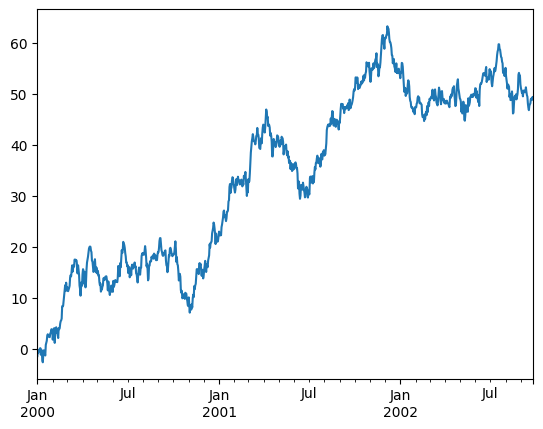

In [414]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [415]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']
)
print(df)

                   A         B         C         D
2000-01-01 -2.438817 -0.134279  1.422748  0.926215
2000-01-02  0.965397  1.236131  0.088658  0.197316
2000-01-03 -0.617652 -0.316073  0.615771  1.203884
2000-01-04 -0.139446 -0.450189  0.000528  0.601207
2000-01-05 -1.443855 -2.296181 -0.550537 -1.220712
...              ...       ...       ...       ...
2002-09-22  0.001977  1.532873 -1.345014 -0.861050
2002-09-23  1.377181  1.020037 -0.363132  0.854402
2002-09-24  0.341216  1.500275  0.074510  1.025632
2002-09-25  2.642012  0.598099  0.049328  0.722447
2002-09-26 -0.365281  2.387968  0.180071 -0.272933

[1000 rows x 4 columns]


In [416]:
df = df.cumsum()
print(df)

                    A         B          C          D
2000-01-01  -2.438817 -0.134279   1.422748   0.926215
2000-01-02  -1.473420  1.101852   1.511406   1.123531
2000-01-03  -2.091072  0.785779   2.127177   2.327416
2000-01-04  -2.230518  0.335589   2.127705   2.928622
2000-01-05  -3.674373 -1.960592   1.577168   1.707910
...               ...       ...        ...        ...
2002-09-22 -80.573577 -7.739971  33.488349 -44.989692
2002-09-23 -79.196396 -6.719935  33.125217 -44.135290
2002-09-24 -78.855180 -5.219660  33.199727 -43.109658
2002-09-25 -76.213168 -4.621561  33.249055 -42.387211
2002-09-26 -76.578449 -2.233593  33.429126 -42.660144

[1000 rows x 4 columns]


<Figure size 640x480 with 0 Axes>

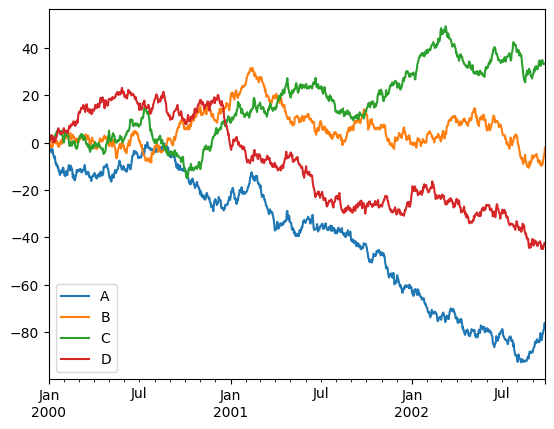

In [417]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [359]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [360]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.141814,0.824580,-0.726712,-0.756052
1,2000-01-02,-1.449764,0.643823,-1.441148,-1.661565
2,2000-01-03,-0.353516,-1.542249,-0.068394,-1.793389
3,2000-01-04,-0.228598,-3.223037,0.246074,-4.225665
4,2000-01-05,1.194674,-2.736995,1.379911,-4.892016
...,...,...,...,...,...
995,2002-09-22,-48.724053,12.074334,-16.473938,-0.644901
996,2002-09-23,-48.827905,11.834425,-17.234109,-2.318002
997,2002-09-24,-47.444951,10.776621,-17.846324,-0.655894
998,2002-09-25,-48.701379,10.292208,-16.037226,0.645176


### HDF5 (STOP)
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [361]:
df.to_hdf('foo.h5','df')

C:\Users\hi\AppData\Local\Temp\ipykernel_17940\3091100212.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf('foo.h5','df')


ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

Reading from a HDF5 Store

In [362]:
pd.read_hdf('foo.h5','df')

FileNotFoundError: File foo.h5 does not exist

### Excel (STOP)

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [363]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

ModuleNotFoundError: No module named 'openpyxl'

Reading from an excel file

In [364]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

FileNotFoundError: [Errno 2] No such file or directory: 'foo.xlsx'

### Gotchas
If you are trying an operation and you see an exception like:

In [365]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.